# Mobile Price Classification using SVM

In [98]:
# Importing the required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [115]:
# Reading the dataset
data_set = pd.read_csv("train.csv")
data_set.shape

(2000, 21)

In [116]:
# Splitting the input features and target variable in the dataset (last column is the target variable)
X = data_set.iloc[:, :-1]
y = data_set.iloc[:, -1]

## Without Normalization

In [117]:
# Splitting the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Kernel

In [118]:
# Initializing and training the SVM classifier (Cross Validation)
svm_classifier1 = SVC(kernel='linear')
y_train_pred1 = cross_val_predict(svm_classifier1, X_train, y_train, cv=5)

In [119]:
# Cross-validation predictions and performance metrics
y_train_pred1 = cross_val_predict(svm_classifier1, X_train, y_train, cv=5)
accuracy_cv1 = cross_val_score(svm_classifier1, X_train, y_train, cv=5, scoring='accuracy')
precision_cv1 = cross_val_score(svm_classifier1, X_train, y_train, cv=5, scoring='precision_macro', error_score='raise')
recall_cv1 = cross_val_score(svm_classifier1, X_train, y_train, cv=5, scoring='recall_macro', error_score='raise')
f1score_cv1 = cross_val_score(svm_classifier1, X_train, y_train, cv=5, scoring='f1_macro', error_score='raise')

acc_cv1 = round(np.mean(accuracy_cv1)*100,3)
pre_cv1 = round(np.mean(precision_cv1)*100,3)
rec_cv1 = round(np.mean(recall_cv1)*100,3)
f1_cv1 = round(np.mean(f1score_cv1)*100,3)

print('Cross-Validation Accuracy (Without Normalization):',acc_cv1,'%')
print('Cross-Validation Precision (Without Normalization):',pre_cv1,'%')
print('Cross-Validation Recall (Without Normalization)',rec_cv1,'%')
print('Cross-Validation F1 Score (Without Normalization):',f1_cv1,'%')

Cross-Validation Accuracy (Without Normalization): 97.25 %
Cross-Validation Precision (Without Normalization): 97.274 %
Cross-Validation Recall (Without Normalization) 97.285 %
Cross-Validation F1 Score (Without Normalization): 97.264 %


In [120]:
# Making predictions on the test set
svm_classifier1.fit(X_train, y_train)
y_test_pred1 = svm_classifier1.predict(X_test)

In [121]:
# Evaluating the classifier on the test set
accuracy_test1 = accuracy_score(y_test, y_test_pred1)
precision_test1 = precision_score(y_test, y_test_pred1, average='macro', zero_division=0)
recall_test1 = recall_score(y_test, y_test_pred1, average='macro', zero_division=0)
f1score_test1 = f1_score(y_test, y_test_pred1, average='macro', zero_division=0)

acc_tst1 = round(np.mean(accuracy_test1)*100,3)
pre_tst1 = round(np.mean(precision_test1)*100,3)
rec_tst1 = round(np.mean(recall_test1)*100,3)
f1_tst1 = round(np.mean(f1score_test1)*100,3)

print('Test Accuracy (Without Normalization):',acc_tst1,'%')
print('Test Precision (Without Normalization):',pre_tst1,'%')
print('Test Recall (Without Normalization)',rec_tst1,'%')
print('Test F1 Score (Without Normalization):',f1_tst1,'%')

Test Accuracy (Without Normalization): 97.0 %
Test Precision (Without Normalization): 97.023 %
Test Recall (Without Normalization) 96.99 %
Test F1 Score (Without Normalization): 96.92 %


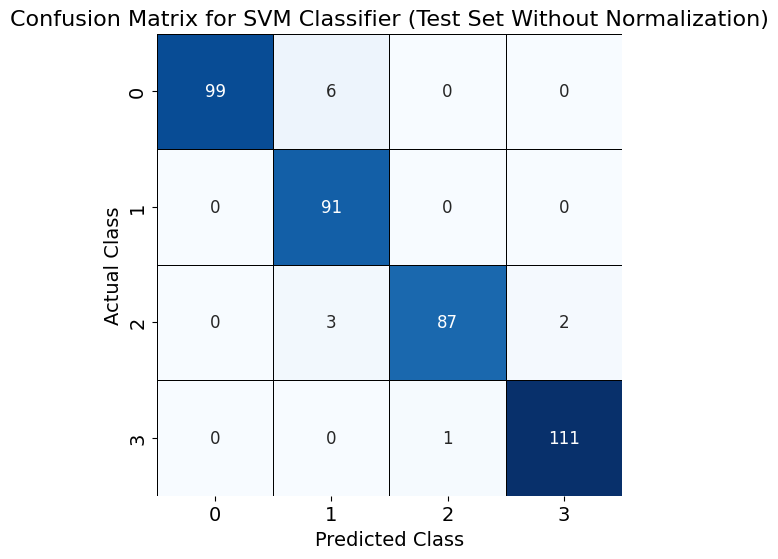

In [122]:
# Generating and plotting the confusion matrix for the test set
conf_matrix_test1 = confusion_matrix(y_test, y_test_pred1)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_test1, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=svm_classifier1.classes_, yticklabels=svm_classifier1.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for SVM Classifier (Test Set Without Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

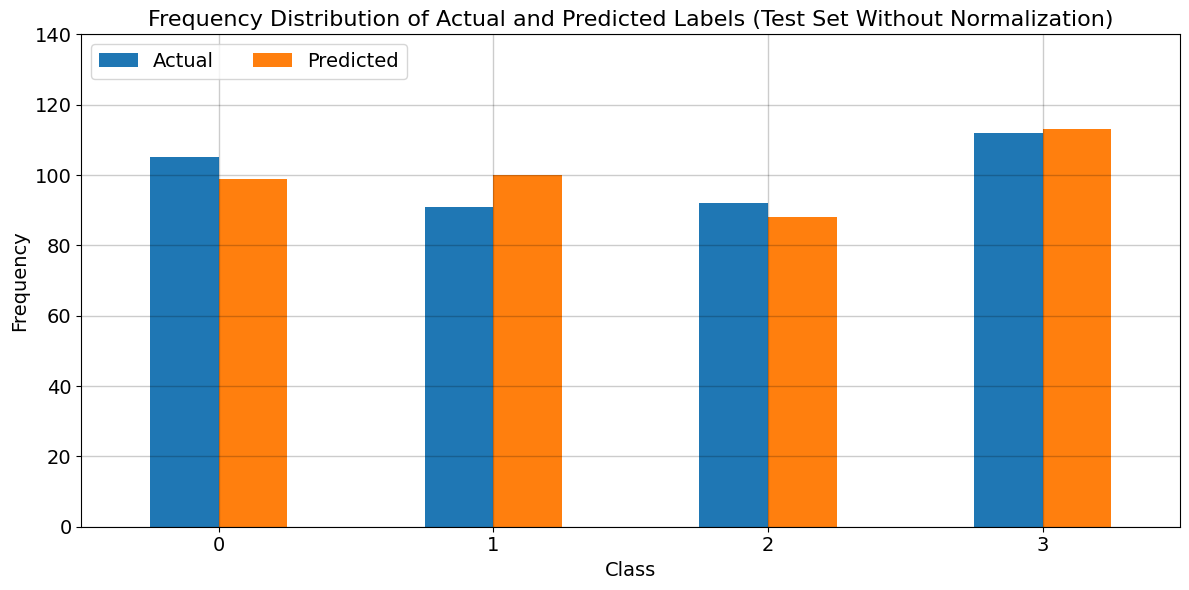

In [123]:
# Plotting the bar graph for frequency distribution of actual and predicted labels (Test Set)
actual_labels_test, actual_counts_test = np.unique(y_test, return_counts=True)
predicted_labels_test1, predicted_counts_test1 = np.unique(y_test_pred1, return_counts=True)

labels_test = np.unique(y_test)

x_test = np.arange(len(labels_test))
width = 0.25

fig, ax = plt.subplots(figsize=(12,6))
rects1_test = ax.bar(x_test - width/2, actual_counts_test, width, label='Actual')
rects2_test = ax.bar(x_test + width/2, predicted_counts_test1, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (Test Set Without Normalization)', color='black', fontsize=16)
ax.set_xticks(x_test)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper left")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels_test) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

### Polynomial Kernel

In [124]:
# Initializing and training the SVM classifier (Cross Validation)
svm_classifier2 = SVC(kernel='poly')
y_train_pred2 = cross_val_predict(svm_classifier2, X_train, y_train, cv=5)

In [125]:
# Cross-validation predictions and performance metrics
y_train_pred2 = cross_val_predict(svm_classifier2, X_train, y_train, cv=5)
accuracy_cv2 = cross_val_score(svm_classifier2, X_train, y_train, cv=5, scoring='accuracy')
precision_cv2 = cross_val_score(svm_classifier2, X_train, y_train, cv=5, scoring='precision_macro', error_score='raise')
recall_cv2 = cross_val_score(svm_classifier2, X_train, y_train, cv=5, scoring='recall_macro', error_score='raise')
f1score_cv2 = cross_val_score(svm_classifier2, X_train, y_train, cv=5, scoring='f1_macro', error_score='raise')

acc_cv2 = round(np.mean(accuracy_cv2)*100,3)
pre_cv2 = round(np.mean(precision_cv2)*100,3)
rec_cv2 = round(np.mean(recall_cv2)*100,3)
f1_cv2 = round(np.mean(f1score_cv2)*100,3)

print('Cross-Validation Accuracy (Without Normalization):',acc_cv2,'%')
print('Cross-Validation Precision (Without Normalization):',pre_cv2,'%')
print('Cross-Validation Recall (Without Normalization)',rec_cv2,'%')
print('Cross-Validation F1 Score (Without Normalization):',f1_cv2,'%')

Cross-Validation Accuracy (Without Normalization): 95.438 %
Cross-Validation Precision (Without Normalization): 95.513 %
Cross-Validation Recall (Without Normalization) 95.478 %
Cross-Validation F1 Score (Without Normalization): 95.454 %


In [126]:
# Making predictions on the test set
svm_classifier2.fit(X_train, y_train)
y_test_pred2 = svm_classifier2.predict(X_test)

In [127]:
# Evaluating the classifier on the test set
accuracy_test2 = accuracy_score(y_test, y_test_pred2)
precision_test2 = precision_score(y_test, y_test_pred2, average='macro', zero_division=0)
recall_test2 = recall_score(y_test, y_test_pred2, average='macro', zero_division=0)
f1score_test2 = f1_score(y_test, y_test_pred2, average='macro', zero_division=0)

acc_tst2 = round(np.mean(accuracy_test2)*100,3)
pre_tst2 = round(np.mean(precision_test2)*100,3)
rec_tst2 = round(np.mean(recall_test2)*100,3)
f1_tst2 = round(np.mean(f1score_test2)*100,3)

print('Test Accuracy (Without Normalization):',acc_tst2,'%')
print('Test Precision (Without Normalization):',pre_tst2,'%')
print('Test Recall (Without Normalization)',rec_tst2,'%')
print('Test F1 Score (Without Normalization):',f1_tst2,'%')

Test Accuracy (Without Normalization): 96.25 %
Test Precision (Without Normalization): 96.156 %
Test Recall (Without Normalization) 96.143 %
Test F1 Score (Without Normalization): 96.137 %


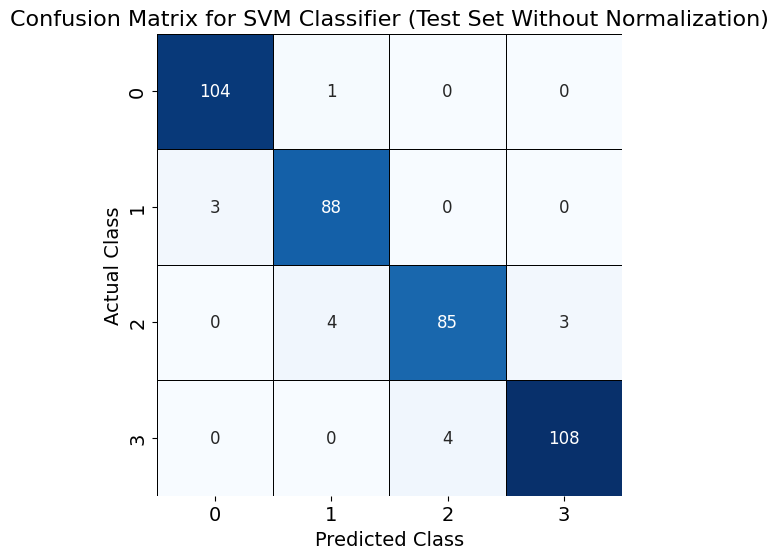

In [128]:
# Generating and plotting the confusion matrix for the test set
conf_matrix_test2 = confusion_matrix(y_test, y_test_pred2)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_test2, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=svm_classifier2.classes_, yticklabels=svm_classifier2.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for SVM Classifier (Test Set Without Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

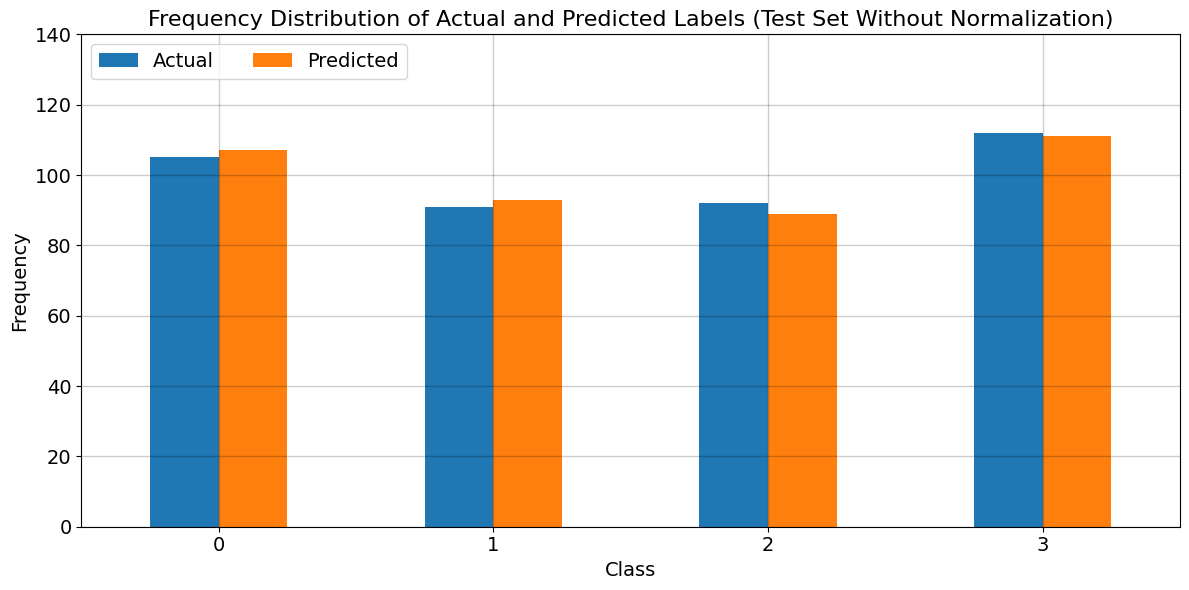

In [129]:
# Plotting the bar graph for frequency distribution of actual and predicted labels (Test Set)
actual_labels_test, actual_counts_test = np.unique(y_test, return_counts=True)
predicted_labels_test2, predicted_counts_test2 = np.unique(y_test_pred2, return_counts=True)

labels_test = np.unique(y_test)

x_test = np.arange(len(labels_test))
width = 0.25

fig, ax = plt.subplots(figsize=(12,6))
rects1_test = ax.bar(x_test - width/2, actual_counts_test, width, label='Actual')
rects2_test = ax.bar(x_test + width/2, predicted_counts_test2, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (Test Set Without Normalization)', color='black', fontsize=16)
ax.set_xticks(x_test)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper left")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels_test) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

### RBF Kernel

In [130]:
# Initializing and training the SVM classifier (Cross Validation)
svm_classifier3 = SVC(kernel='rbf')
y_train_pred3 = cross_val_predict(svm_classifier3, X_train, y_train, cv=5)

In [131]:
# Cross-validation predictions and performance metrics
y_train_pred3 = cross_val_predict(svm_classifier3, X_train, y_train, cv=5)
accuracy_cv3 = cross_val_score(svm_classifier3, X_train, y_train, cv=5, scoring='accuracy')
precision_cv3 = cross_val_score(svm_classifier3, X_train, y_train, cv=5, scoring='precision_macro', error_score='raise')
recall_cv3 = cross_val_score(svm_classifier3, X_train, y_train, cv=5, scoring='recall_macro', error_score='raise')
f1score_cv3 = cross_val_score(svm_classifier3, X_train, y_train, cv=5, scoring='f1_macro', error_score='raise')

acc_cv3 = round(np.mean(accuracy_cv3)*100,3)
pre_cv3 = round(np.mean(precision_cv3)*100,3)
rec_cv3 = round(np.mean(recall_cv3)*100,3)
f1_cv3 = round(np.mean(f1score_cv3)*100,3)

print('Cross-Validation Accuracy (Without Normalization):',acc_cv3,'%')
print('Cross-Validation Precision (Without Normalization):',pre_cv3,'%')
print('Cross-Validation Recall (Without Normalization)',rec_cv3,'%')
print('Cross-Validation F1 Score (Without Normalization):',f1_cv3,'%')

Cross-Validation Accuracy (Without Normalization): 95.188 %
Cross-Validation Precision (Without Normalization): 95.259 %
Cross-Validation Recall (Without Normalization) 95.223 %
Cross-Validation F1 Score (Without Normalization): 95.215 %


In [132]:
# Making predictions on the test set
svm_classifier3.fit(X_train, y_train)
y_test_pred3 = svm_classifier3.predict(X_test)

In [133]:
# Evaluating the classifier on the test set
accuracy_test3 = accuracy_score(y_test, y_test_pred3)
precision_test3 = precision_score(y_test, y_test_pred3, average='macro', zero_division=0)
recall_test3 = recall_score(y_test, y_test_pred3, average='macro', zero_division=0)
f1score_test3 = f1_score(y_test, y_test_pred3, average='macro', zero_division=0)

acc_tst3 = round(np.mean(accuracy_test3)*100,3)
pre_tst3 = round(np.mean(precision_test3)*100,3)
rec_tst3 = round(np.mean(recall_test3)*100,3)
f1_tst3 = round(np.mean(f1score_test3)*100,3)

print('Test Accuracy (Without Normalization):',acc_tst3,'%')
print('Test Precision (Without Normalization):',pre_tst3,'%')
print('Test Recall (Without Normalization)',rec_tst3,'%')
print('Test F1 Score (Without Normalization):',f1_tst3,'%')

Test Accuracy (Without Normalization): 96.5 %
Test Precision (Without Normalization): 96.368 %
Test Recall (Without Normalization) 96.551 %
Test F1 Score (Without Normalization): 96.439 %


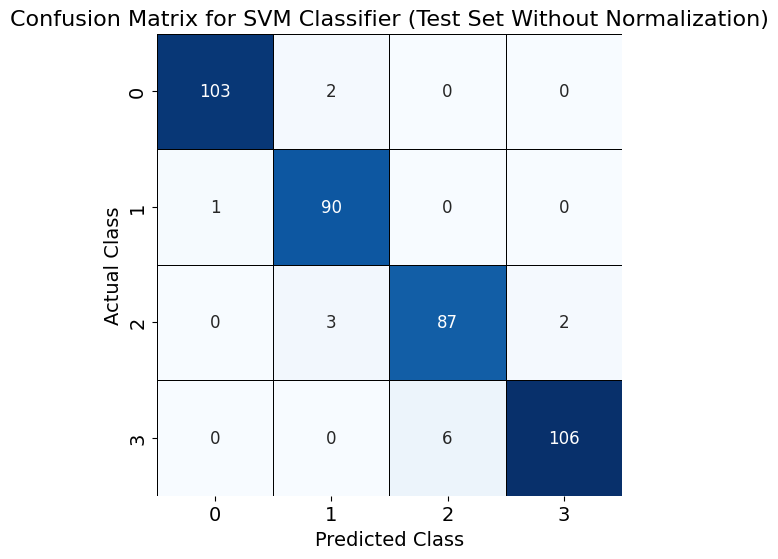

In [134]:
# Generating and plotting the confusion matrix for the test set
conf_matrix_test3 = confusion_matrix(y_test, y_test_pred3)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_test3, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=svm_classifier3.classes_, yticklabels=svm_classifier3.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for SVM Classifier (Test Set Without Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

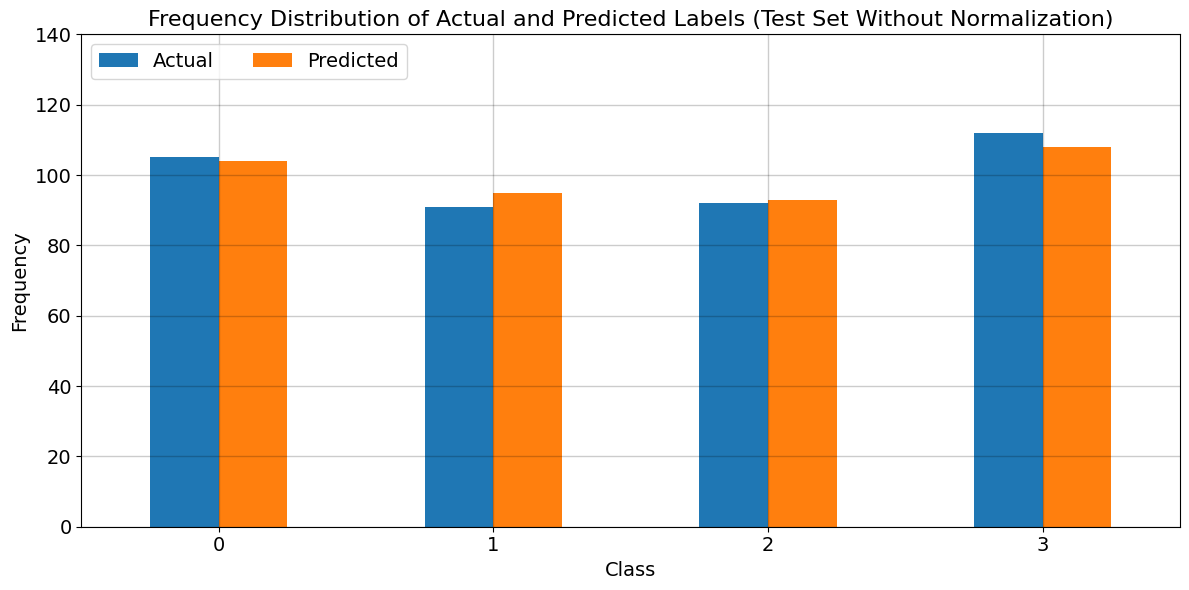

In [135]:
# Plotting the bar graph for frequency distribution of actual and predicted labels (Test Set)
actual_labels_test, actual_counts_test = np.unique(y_test, return_counts=True)
predicted_labels_test3, predicted_counts_test3 = np.unique(y_test_pred3, return_counts=True)

labels_test = np.unique(y_test)

x_test = np.arange(len(labels_test))
width = 0.25

fig, ax = plt.subplots(figsize=(12,6))
rects1_test = ax.bar(x_test - width/2, actual_counts_test, width, label='Actual')
rects2_test = ax.bar(x_test + width/2, predicted_counts_test3, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (Test Set Without Normalization)', color='black', fontsize=16)
ax.set_xticks(x_test)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper left")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels_test) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

### Sigmoid Kernel

In [158]:
# Initializing and training the SVM classifier (Cross Validation)
svm_classifier4 = SVC(kernel='sigmoid')
y_train_pred4 = cross_val_predict(svm_classifier4, X_train, y_train, cv=5)

In [159]:
# Cross-validation predictions and performance metrics
y_train_pred4 = cross_val_predict(svm_classifier4, X_train, y_train, cv=5)
accuracy_cv4 = cross_val_score(svm_classifier4, X_train, y_train, cv=5, scoring='accuracy')
precision_cv4 = cross_val_score(svm_classifier4, X_train, y_train, cv=5, scoring='precision_macro', error_score='raise')
recall_cv4 = cross_val_score(svm_classifier4, X_train, y_train, cv=5, scoring='recall_macro', error_score='raise')
f1score_cv4 = cross_val_score(svm_classifier4, X_train, y_train, cv=5, scoring='f1_macro', error_score='raise')

acc_cv4 = round(np.mean(accuracy_cv4)*100,3)
pre_cv4 = round(np.mean(precision_cv4)*100,3)
rec_cv4 = round(np.mean(recall_cv4)*100,3)
f1_cv4 = round(np.mean(f1score_cv4)*100,3)

print('Cross-Validation Accuracy (Without Normalization):',acc_cv4,'%')
print('Cross-Validation Precision (Without Normalization):',pre_cv4,'%')
print('Cross-Validation Recall (Without Normalization)',rec_cv4,'%')
print('Cross-Validation F1 Score (Without Normalization):',f1_cv4,'%')

d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricW

Cross-Validation Accuracy (Without Normalization): 19.75 %
Cross-Validation Precision (Without Normalization): 23.051 %
Cross-Validation Recall (Without Normalization) 19.919 %
Cross-Validation F1 Score (Without Normalization): 21.063 %


In [160]:
# Making predictions on the test set
svm_classifier4.fit(X_train, y_train)
y_test_pred4 = svm_classifier4.predict(X_test)

In [161]:
# Evaluating the classifier on the test set
accuracy_test4 = accuracy_score(y_test, y_test_pred4)
precision_test4 = precision_score(y_test, y_test_pred4, average='macro', zero_division=0)
recall_test4 = recall_score(y_test, y_test_pred4, average='macro', zero_division=0)
f1score_test4 = f1_score(y_test, y_test_pred4, average='macro', zero_division=0)

acc_tst4 = round(np.mean(accuracy_test4)*100,3)
pre_tst4 = round(np.mean(precision_test4)*100,3)
rec_tst4 = round(np.mean(recall_test4)*100,3)
f1_tst4 = round(np.mean(f1score_test4)*100,3)

print('Test Accuracy (Without Normalization):',acc_tst4,'%')
print('Test Precision (Without Normalization):',pre_tst4,'%')
print('Test Recall (Without Normalization)',rec_tst4,'%')
print('Test F1 Score (Without Normalization):',f1_tst4,'%')

Test Accuracy (Without Normalization): 17.5 %
Test Precision (Without Normalization): 19.977 %
Test Recall (Without Normalization) 16.878 %
Test F1 Score (Without Normalization): 18.141 %


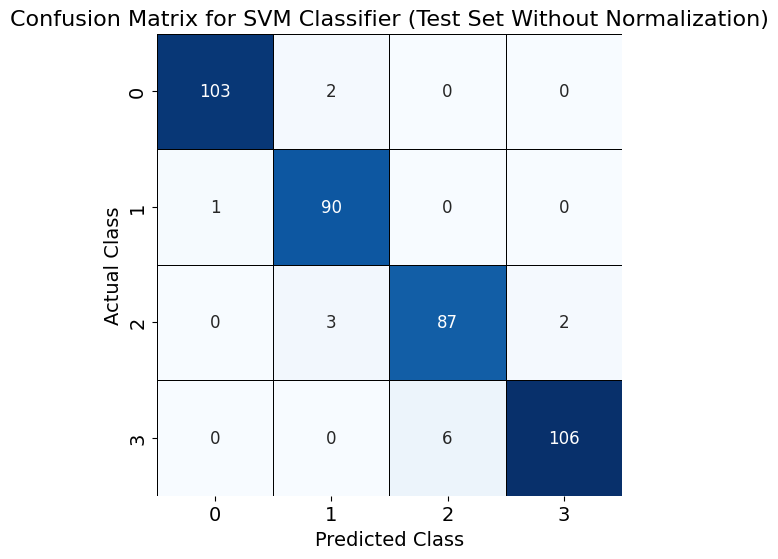

In [162]:
# Generating and plotting the confusion matrix for the test set
conf_matrix_test4 = confusion_matrix(y_test, y_test_pred3)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_test4, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=svm_classifier4.classes_, yticklabels=svm_classifier4.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for SVM Classifier (Test Set Without Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

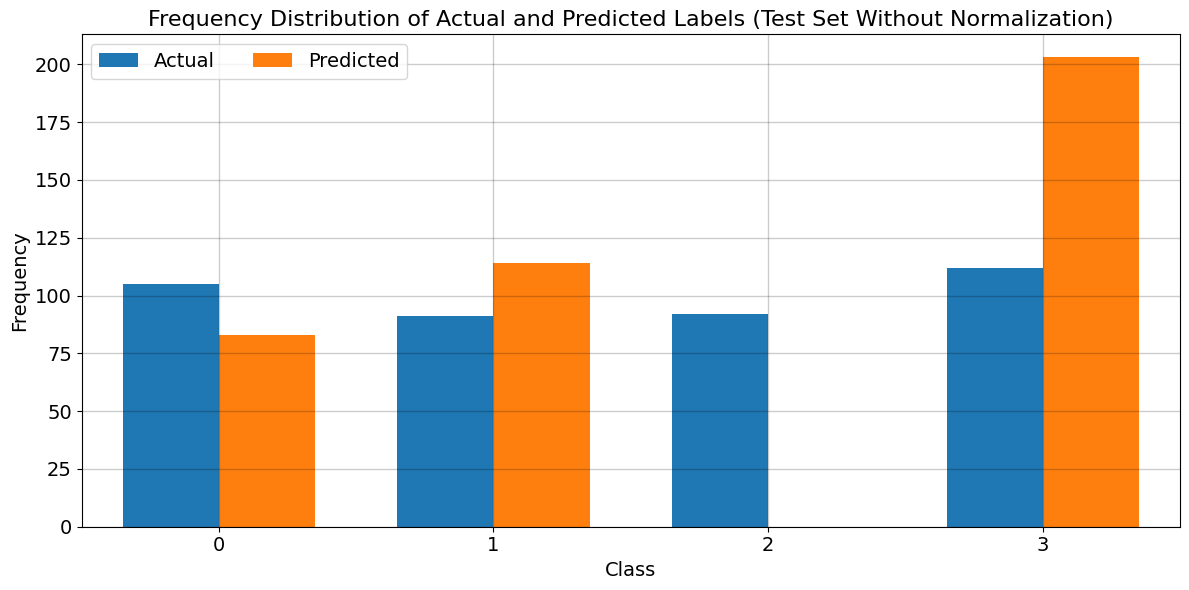

In [163]:
# Plotting the bar graph for frequency distribution of actual and predicted labels (Test Set)
actual_labels_test, actual_counts_test = np.unique(y_test, return_counts=True)
predicted_labels_test4, predicted_counts_test4 = np.unique(y_test_pred4, return_counts=True)

all_classes = np.unique(np.concatenate((y_test, y_test_pred4)))

actual_counts_dict = dict(zip(actual_labels_test, actual_counts_test))
predicted_counts_dict = dict(zip(predicted_labels_test4, predicted_counts_test4))

# Initialize counts with zeros for all classes
actual_counts_aligned = [actual_counts_dict.get(cls, 0) for cls in all_classes]
predicted_counts_aligned = [predicted_counts_dict.get(cls, 0) for cls in all_classes]

x_test = np.arange(len(all_classes))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rects1_test = ax.bar(x_test - width / 2, actual_counts_aligned, width, label='Actual')
rects2_test = ax.bar(x_test + width / 2, predicted_counts_aligned, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (Test Set Without Normalization)', color='black', fontsize=16)
ax.set_xticks(x_test)
ax.set_xticklabels(all_classes, fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper left")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

# Reducing space between the bars of different classes by adjusting the limits
ax.set_xlim([-0.5, len(all_classes) - 0.5])
plt.ylim((0, max(max(actual_counts_aligned), max(predicted_counts_aligned)) + 10))
fig.tight_layout()
plt.show()

## With Normalization

In [164]:
# Normalizing the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [165]:
# Splitting the dataset into training and testing sets
X_train_normalized, X_test_normalized, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

### Linear Kernel

In [168]:
# Initializing and training the SVM classifier (Cross Validation)
svm_classifier5 = SVC(kernel='linear')
y_train_pred5 = cross_val_predict(svm_classifier5, X_train_normalized, y_train, cv=5)

In [169]:
# Cross-validation predictions and performance metrics
y_train_pred5 = cross_val_predict(svm_classifier5, X_train_normalized, y_train, cv=5)
accuracy_cv5 = cross_val_score(svm_classifier5, X_train_normalized, y_train, cv=5, scoring='accuracy')
precision_cv5 = cross_val_score(svm_classifier5, X_train_normalized, y_train, cv=5, scoring='precision_macro', error_score='raise')
recall_cv5 = cross_val_score(svm_classifier5, X_train_normalized, y_train, cv=5, scoring='recall_macro', error_score='raise')
f1score_cv5 = cross_val_score(svm_classifier5, X_train_normalized, y_train, cv=5, scoring='f1_macro', error_score='raise')

acc_cv5 = round(np.mean(accuracy_cv5)*100,3)
pre_cv5 = round(np.mean(precision_cv5)*100,3)
rec_cv5 = round(np.mean(recall_cv5)*100,3)
f1_cv5 = round(np.mean(f1score_cv5)*100,3)

print('Cross-Validation Accuracy (With Normalization):',acc_cv5,'%')
print('Cross-Validation Precision (With Normalization):',pre_cv5,'%')
print('Cross-Validation Recall (With Normalization)',rec_cv5,'%')
print('Cross-Validation F1 Score (With Normalization):',f1_cv5,'%')

Cross-Validation Accuracy (With Normalization): 95.375 %
Cross-Validation Precision (With Normalization): 95.48 %
Cross-Validation Recall (With Normalization) 95.435 %
Cross-Validation F1 Score (With Normalization): 95.429 %


In [170]:
# Making predictions on the test set
svm_classifier5.fit(X_train_normalized, y_train)
y_test_pred5 = svm_classifier5.predict(X_test_normalized)

In [171]:
# Evaluating the classifier on the test set
accuracy_test5 = accuracy_score(y_test, y_test_pred5)
precision_test5 = precision_score(y_test, y_test_pred5, average='macro', zero_division=0)
recall_test5 = recall_score(y_test, y_test_pred5, average='macro', zero_division=0)
f1score_test5 = f1_score(y_test, y_test_pred5, average='macro', zero_division=0)

acc_tst5 = round(np.mean(accuracy_test5)*100,3)
pre_tst5 = round(np.mean(precision_test5)*100,3)
rec_tst5 = round(np.mean(recall_test5)*100,3)
f1_tst5 = round(np.mean(f1score_test5)*100,3)

print('Test Accuracy (With Normalization):',acc_tst5,'%')
print('Test Precision (With Normalization):',pre_tst5,'%')
print('Test Recall (With Normalization)',rec_tst5,'%')
print('Test F1 Score (With Normalization):',f1_tst5,'%')

Test Accuracy (With Normalization): 97.0 %
Test Precision (With Normalization): 97.086 %
Test Recall (With Normalization) 96.975 %
Test F1 Score (With Normalization): 96.916 %


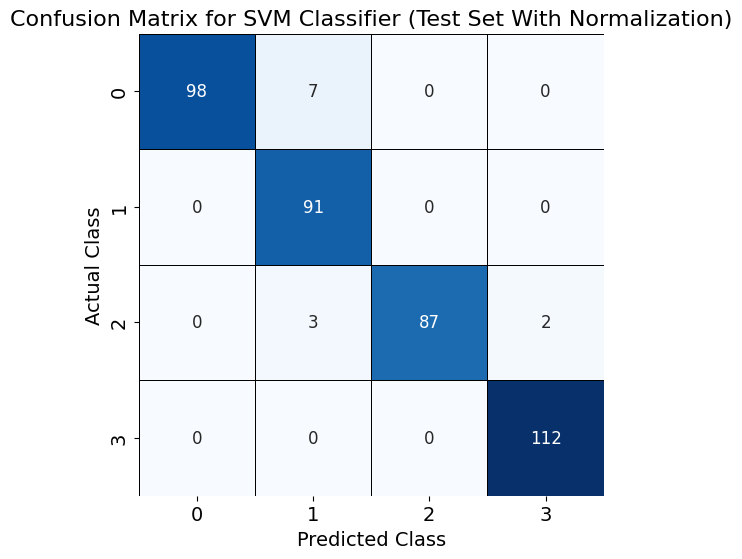

In [172]:
# Generating and plotting the confusion matrix for the test set
conf_matrix_test5 = confusion_matrix(y_test, y_test_pred5)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_test5, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=svm_classifier5.classes_, yticklabels=svm_classifier5.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for SVM Classifier (Test Set With Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

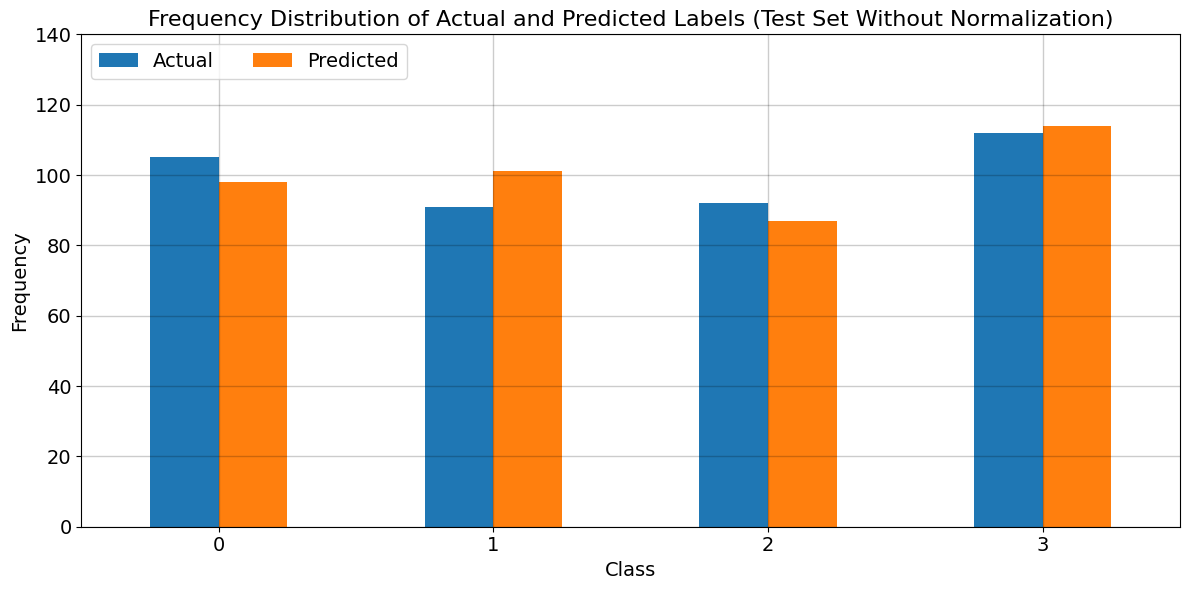

In [173]:
# Plotting the bar graph for frequency distribution of actual and predicted labels (Test Set)
actual_labels_test, actual_counts_test = np.unique(y_test, return_counts=True)
predicted_labels_test5, predicted_counts_test5 = np.unique(y_test_pred5, return_counts=True)

labels_test = np.unique(y_test)

x_test = np.arange(len(labels_test))
width = 0.25

fig, ax = plt.subplots(figsize=(12,6))
rects1_test = ax.bar(x_test - width/2, actual_counts_test, width, label='Actual')
rects2_test = ax.bar(x_test + width/2, predicted_counts_test5, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (Test Set Without Normalization)', color='black', fontsize=16)
ax.set_xticks(x_test)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper left")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels_test) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

### Polynomial Kernel

In [174]:
# Initializing and training the SVM classifier (Cross Validation)
svm_classifier6 = SVC(kernel='poly')
y_train_pred6 = cross_val_predict(svm_classifier6, X_train_normalized, y_train, cv=5)

In [175]:
# Cross-validation predictions and performance metrics
y_train_pred6 = cross_val_predict(svm_classifier6, X_train_normalized, y_train, cv=5)
accuracy_cv6 = cross_val_score(svm_classifier6, X_train_normalized, y_train, cv=5, scoring='accuracy')
precision_cv6 = cross_val_score(svm_classifier6, X_train_normalized, y_train, cv=5, scoring='precision_macro', error_score='raise')
recall_cv6 = cross_val_score(svm_classifier6, X_train_normalized, y_train, cv=5, scoring='recall_macro', error_score='raise')
f1score_cv6 = cross_val_score(svm_classifier6, X_train_normalized, y_train, cv=5, scoring='f1_macro', error_score='raise')

acc_cv6 = round(np.mean(accuracy_cv6)*100,3)
pre_cv6 = round(np.mean(precision_cv6)*100,3)
rec_cv6 = round(np.mean(recall_cv6)*100,3)
f1_cv6 = round(np.mean(f1score_cv6)*100,3)

print('Cross-Validation Accuracy (With Normalization):',acc_cv6,'%')
print('Cross-Validation Precision (With Normalization):',pre_cv6,'%')
print('Cross-Validation Recall (With Normalization)',rec_cv6,'%')
print('Cross-Validation F1 Score (With Normalization):',f1_cv6,'%')

Cross-Validation Accuracy (With Normalization): 75.625 %
Cross-Validation Precision (With Normalization): 77.889 %
Cross-Validation Recall (With Normalization) 75.66 %
Cross-Validation F1 Score (With Normalization): 76.307 %


In [176]:
# Making predictions on the test set
svm_classifier6.fit(X_train_normalized, y_train)
y_test_pred6 = svm_classifier6.predict(X_test_normalized)

In [177]:
# Evaluating the classifier on the test set
accuracy_test6 = accuracy_score(y_test, y_test_pred6)
precision_test6 = precision_score(y_test, y_test_pred6, average='macro', zero_division=0)
recall_test6 = recall_score(y_test, y_test_pred6, average='macro', zero_division=0)
f1score_test6 = f1_score(y_test, y_test_pred6, average='macro', zero_division=0)

acc_tst6 = round(np.mean(accuracy_test6)*100,3)
pre_tst6 = round(np.mean(precision_test6)*100,3)
rec_tst6 = round(np.mean(recall_test6)*100,3)
f1_tst6 = round(np.mean(f1score_test6)*100,3)

print('Test Accuracy (With Normalization):',acc_tst6,'%')
print('Test Precision (With Normalization):',pre_tst6,'%')
print('Test Recall (With Normalization)',rec_tst6,'%')
print('Test F1 Score (With Normalization):',f1_tst6,'%')

Test Accuracy (With Normalization): 78.75 %
Test Precision (With Normalization): 79.024 %
Test Recall (With Normalization) 78.436 %
Test F1 Score (With Normalization): 78.483 %


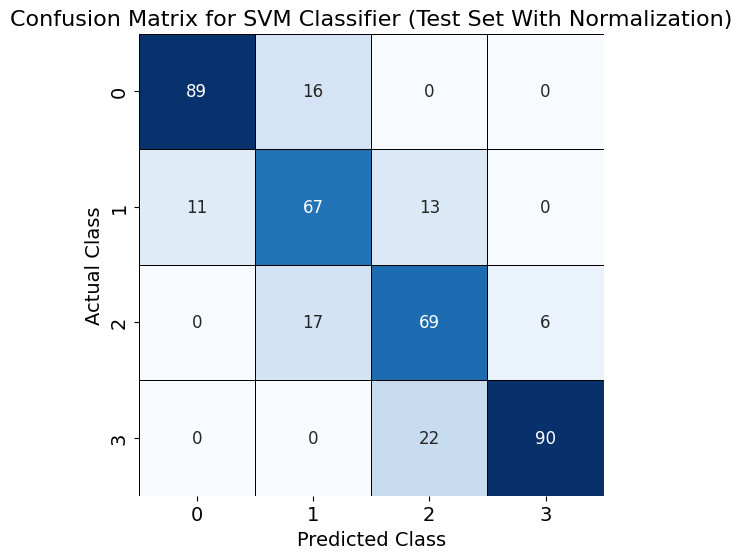

In [178]:
# Generating and plotting the confusion matrix for the test set
conf_matrix_test6 = confusion_matrix(y_test, y_test_pred6)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_test6, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=svm_classifier6.classes_, yticklabels=svm_classifier6.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for SVM Classifier (Test Set With Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

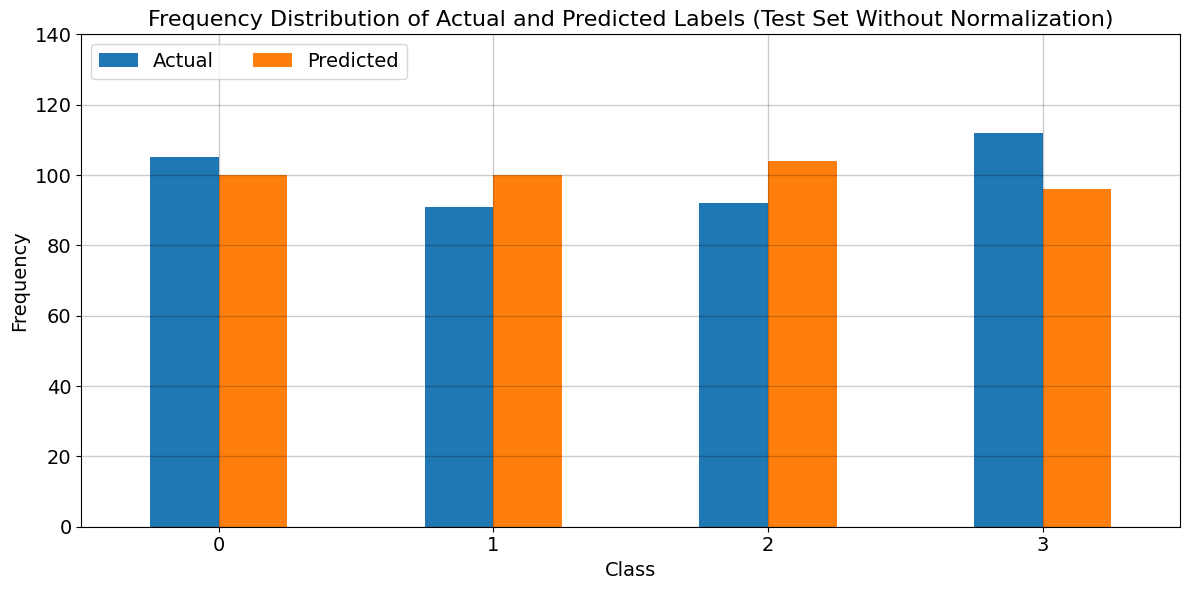

In [179]:
# Plotting the bar graph for frequency distribution of actual and predicted labels (Test Set)
actual_labels_test, actual_counts_test = np.unique(y_test, return_counts=True)
predicted_labels_test6, predicted_counts_test6 = np.unique(y_test_pred6, return_counts=True)

labels_test = np.unique(y_test)

x_test = np.arange(len(labels_test))
width = 0.25

fig, ax = plt.subplots(figsize=(12,6))
rects1_test = ax.bar(x_test - width/2, actual_counts_test, width, label='Actual')
rects2_test = ax.bar(x_test + width/2, predicted_counts_test6, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (Test Set Without Normalization)', color='black', fontsize=16)
ax.set_xticks(x_test)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper left")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels_test) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

### RBF Kernel

In [180]:
# Initializing and training the SVM classifier (Cross Validation)
svm_classifier7 = SVC(kernel='rbf')
y_train_pred7 = cross_val_predict(svm_classifier7, X_train_normalized, y_train, cv=5)

In [181]:
# Cross-validation predictions and performance metrics
y_train_pred7 = cross_val_predict(svm_classifier7, X_train_normalized, y_train, cv=5)
accuracy_cv7 = cross_val_score(svm_classifier7, X_train_normalized, y_train, cv=5, scoring='accuracy')
precision_cv7 = cross_val_score(svm_classifier7, X_train_normalized, y_train, cv=5, scoring='precision_macro', error_score='raise')
recall_cv7 = cross_val_score(svm_classifier7, X_train_normalized, y_train, cv=5, scoring='recall_macro', error_score='raise')
f1score_cv7 = cross_val_score(svm_classifier7, X_train_normalized, y_train, cv=5, scoring='f1_macro', error_score='raise')

acc_cv7 = round(np.mean(accuracy_cv7)*100,3)
pre_cv7 = round(np.mean(precision_cv7)*100,3)
rec_cv7 = round(np.mean(recall_cv7)*100,3)
f1_cv7 = round(np.mean(f1score_cv7)*100,3)

print('Cross-Validation Accuracy (With Normalization):',acc_cv7,'%')
print('Cross-Validation Precision (With Normalization):',pre_cv7,'%')
print('Cross-Validation Recall (With Normalization)',rec_cv7,'%')
print('Cross-Validation F1 Score (With Normalization):',f1_cv7,'%')

Cross-Validation Accuracy (With Normalization): 86.437 %
Cross-Validation Precision (With Normalization): 86.954 %
Cross-Validation Recall (With Normalization) 86.499 %
Cross-Validation F1 Score (With Normalization): 86.644 %


In [182]:
# Making predictions on the test set
svm_classifier7.fit(X_train_normalized, y_train)
y_test_pred7 = svm_classifier7.predict(X_test_normalized)

In [183]:
# Evaluating the classifier on the test set
accuracy_test7 = accuracy_score(y_test, y_test_pred7)
precision_test7 = precision_score(y_test, y_test_pred7, average='macro', zero_division=0)
recall_test7 = recall_score(y_test, y_test_pred7, average='macro', zero_division=0)
f1score_test7 = f1_score(y_test, y_test_pred7, average='macro', zero_division=0)

acc_tst7 = round(np.mean(accuracy_test7)*100,3)
pre_tst7 = round(np.mean(precision_test7)*100,3)
rec_tst7 = round(np.mean(recall_test7)*100,3)
f1_tst7 = round(np.mean(f1score_test7)*100,3)

print('Test Accuracy (With Normalization):',acc_tst7,'%')
print('Test Precision (With Normalization):',pre_tst7,'%')
print('Test Recall (With Normalization)',rec_tst7,'%')
print('Test F1 Score (With Normalization):',f1_tst7,'%')

Test Accuracy (With Normalization): 89.25 %
Test Precision (With Normalization): 88.969 %
Test Recall (With Normalization) 88.958 %
Test F1 Score (With Normalization): 88.886 %


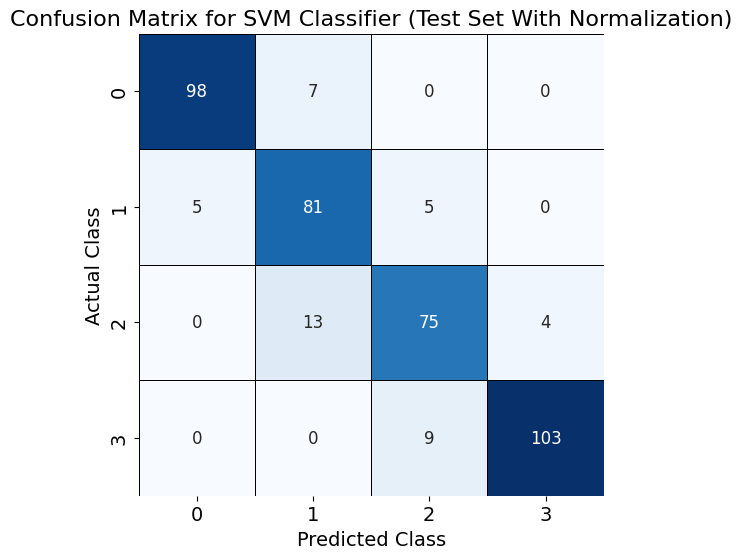

In [184]:
# Generating and plotting the confusion matrix for the test set
conf_matrix_test7 = confusion_matrix(y_test, y_test_pred7)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_test7, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=svm_classifier7.classes_, yticklabels=svm_classifier7.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for SVM Classifier (Test Set With Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

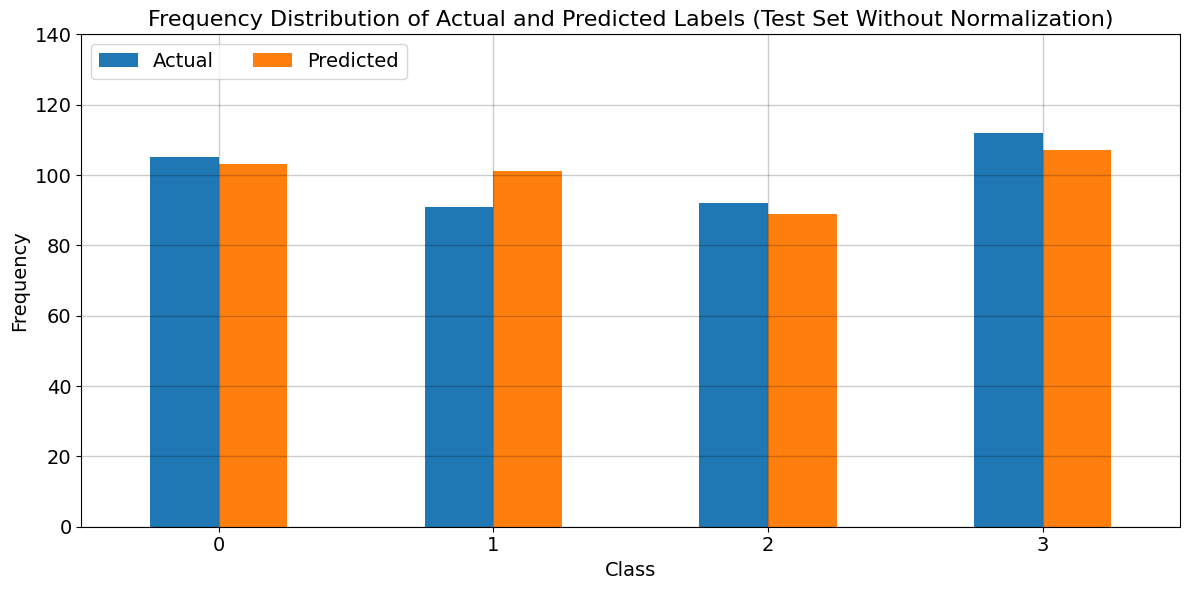

In [185]:
# Plotting the bar graph for frequency distribution of actual and predicted labels (Test Set)
actual_labels_test, actual_counts_test = np.unique(y_test, return_counts=True)
predicted_labels_test7, predicted_counts_test7 = np.unique(y_test_pred7, return_counts=True)

labels_test = np.unique(y_test)

x_test = np.arange(len(labels_test))
width = 0.25

fig, ax = plt.subplots(figsize=(12,6))
rects1_test = ax.bar(x_test - width/2, actual_counts_test, width, label='Actual')
rects2_test = ax.bar(x_test + width/2, predicted_counts_test7, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (Test Set Without Normalization)', color='black', fontsize=16)
ax.set_xticks(x_test)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper left")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels_test) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

### Sigmoid Kernel

In [186]:
# Initializing and training the SVM classifier (Cross Validation)
svm_classifier8 = SVC(kernel='sigmoid')
y_train_pred8 = cross_val_predict(svm_classifier8, X_train_normalized, y_train, cv=5)

In [187]:
# Cross-validation predictions and performance metrics
y_train_pred8 = cross_val_predict(svm_classifier8, X_train_normalized, y_train, cv=5)
accuracy_cv8 = cross_val_score(svm_classifier8, X_train_normalized, y_train, cv=5, scoring='accuracy')
precision_cv8 = cross_val_score(svm_classifier8, X_train_normalized, y_train, cv=5, scoring='precision_macro', error_score='raise')
recall_cv8 = cross_val_score(svm_classifier8, X_train_normalized, y_train, cv=5, scoring='recall_macro', error_score='raise')
f1score_cv8 = cross_val_score(svm_classifier8, X_train_normalized, y_train, cv=5, scoring='f1_macro', error_score='raise')

acc_cv8 = round(np.mean(accuracy_cv8)*100,3)
pre_cv8 = round(np.mean(precision_cv8)*100,3)
rec_cv8 = round(np.mean(recall_cv8)*100,3)
f1_cv8 = round(np.mean(f1score_cv8)*100,3)

print('Cross-Validation Accuracy (With Normalization):',acc_cv8,'%')
print('Cross-Validation Precision (With Normalization):',pre_cv8,'%')
print('Cross-Validation Recall (With Normalization)',rec_cv8,'%')
print('Cross-Validation F1 Score (With Normalization):',f1_cv8,'%')

Cross-Validation Accuracy (With Normalization): 91.125 %
Cross-Validation Precision (With Normalization): 91.316 %
Cross-Validation Recall (With Normalization) 91.167 %
Cross-Validation F1 Score (With Normalization): 91.194 %


In [188]:
# Making predictions on the test set
svm_classifier8.fit(X_train_normalized, y_train)
y_test_pred8 = svm_classifier8.predict(X_test_normalized)

In [189]:
# Evaluating the classifier on the test set
accuracy_test8 = accuracy_score(y_test, y_test_pred8)
precision_test8 = precision_score(y_test, y_test_pred8, average='macro', zero_division=0)
recall_test8 = recall_score(y_test, y_test_pred8, average='macro', zero_division=0)
f1score_test8 = f1_score(y_test, y_test_pred8, average='macro', zero_division=0)

acc_tst8 = round(np.mean(accuracy_test8)*100,3)
pre_tst8 = round(np.mean(precision_test8)*100,3)
rec_tst8 = round(np.mean(recall_test8)*100,3)
f1_tst8 = round(np.mean(f1score_test8)*100,3)

print('Test Accuracy (With Normalization):',acc_tst8,'%')
print('Test Precision (With Normalization):',pre_tst8,'%')
print('Test Recall (With Normalization)',rec_tst8,'%')
print('Test F1 Score (With Normalization):',f1_tst8,'%')

Test Accuracy (With Normalization): 92.25 %
Test Precision (With Normalization): 92.016 %
Test Recall (With Normalization) 92.079 %
Test F1 Score (With Normalization): 92.027 %


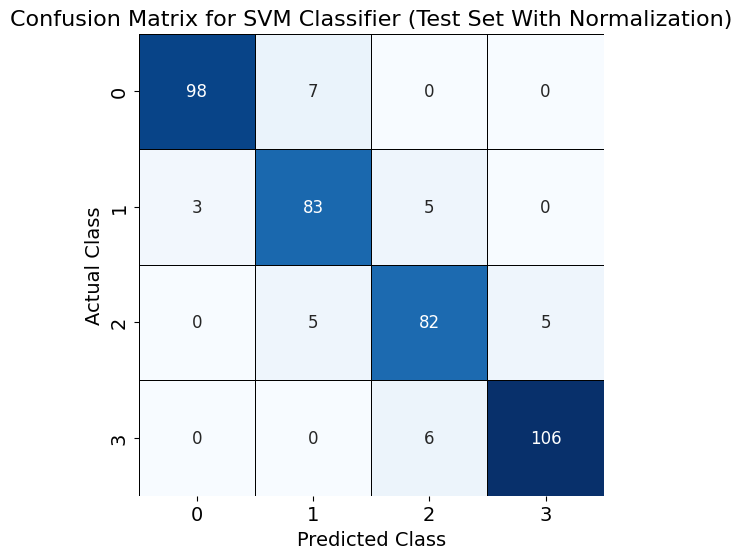

In [190]:
# Generating and plotting the confusion matrix for the test set
conf_matrix_test8 = confusion_matrix(y_test, y_test_pred8)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_test8, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=svm_classifier8.classes_, yticklabels=svm_classifier8.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for SVM Classifier (Test Set With Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

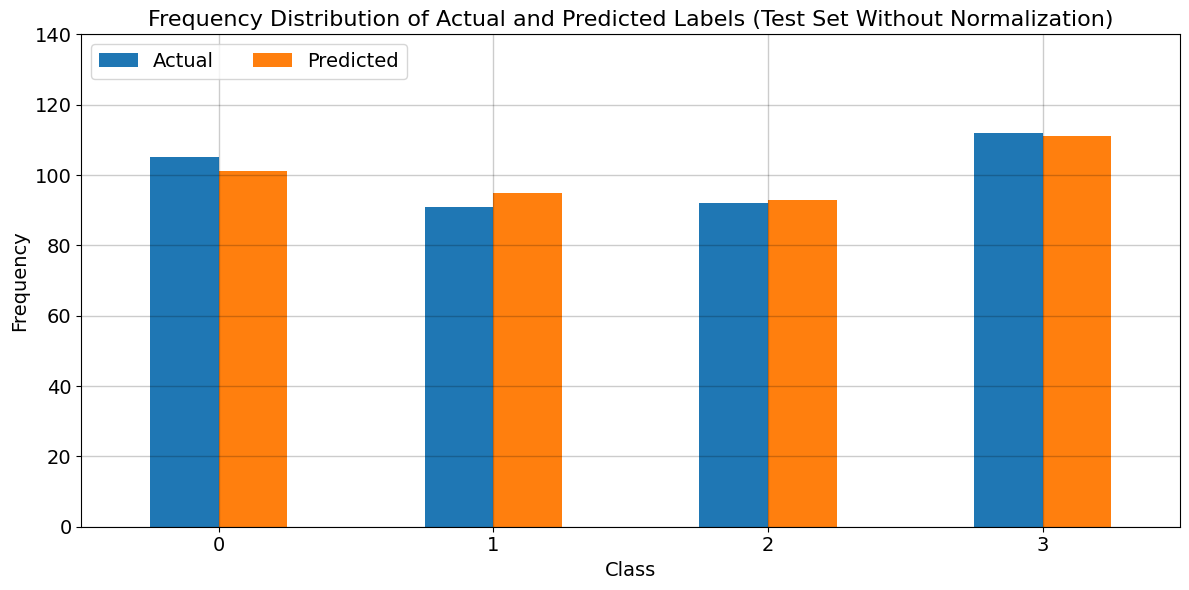

In [191]:
# Plotting the bar graph for frequency distribution of actual and predicted labels (Test Set)
actual_labels_test, actual_counts_test = np.unique(y_test, return_counts=True)
predicted_labels_test8, predicted_counts_test8 = np.unique(y_test_pred8, return_counts=True)

labels_test = np.unique(y_test)

x_test = np.arange(len(labels_test))
width = 0.25

fig, ax = plt.subplots(figsize=(12,6))
rects1_test = ax.bar(x_test - width/2, actual_counts_test, width, label='Actual')
rects2_test = ax.bar(x_test + width/2, predicted_counts_test8, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (Test Set Without Normalization)', color='black', fontsize=16)
ax.set_xticks(x_test)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper left")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels_test) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

***